In [3]:
import os
from glob import glob
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import music21
warnings.filterwarnings("ignore")

import pretty_midi as pm
from ezchord import Chord

from melody import Melody
from utils import get_chord_progressions
from objective_metrics import calculate_HC

In [4]:
%matplotlib inline

In [5]:
src_folder = '..'

version = '1.2'
folder = f"../data/Complete Examples Melodies Auto/v{version}/Weimar DB"

chord_progressions = get_chord_progressions(src_folder)

files = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [6]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-20-03-2022-22-42-16.csv', 
    index_col=0).set_index('out_filename')

In [7]:
res.head()

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,in_filename,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
out_filename,,,,,,,,,,,,,,,,
Art Pepper - Anthropology -1-.mid,32,139,4,9,138,2,1,1,Weimar DB,Art Pepper - Anthropology.mid,10,B- major,Bb,0,"[0.6666, 0.0, 0.0, 0.6666, 1.0, 1.0, 0.6666, 0...",0.655798
Art Pepper - Anthropology -2-.mid,32,139,4,9,138,2,1,1,Weimar DB,Art Pepper - Anthropology.mid,10,B- major,Bb,0,"[0.6666, 0.6666, 0.0, 1.0, 0.6666, 0.0, 0.6666...",0.622929
Art Pepper - Anthropology -3-.mid,32,139,4,9,138,2,1,1,Weimar DB,Art Pepper - Anthropology.mid,10,B- major,Bb,0,"[0.6666, 0.0, 1.0, 0.6666, 0.0, 1.0, 0.0, 1.0,...",0.675908
Art Pepper - Anthropology -4-.mid,32,139,4,9,138,2,1,1,Weimar DB,Art Pepper - Anthropology.mid,10,B- major,Bb,0,"[1.0, 1.0, 0.0, 1.0, 0.6666, 0.6666, 0.6666, 1...",0.730371
Ben Webster - Bye Bye Blackbird -1-.mid,32,100,3,5,99,31,31,0,Weimar DB,Ben Webster - Bye Bye Blackbird.mid,5,G major,F,10,"[1.0, 0.6666, 1.0, 0.6666, 0.6666, 1.0, 0.6666...",0.661816


In [9]:
res.sort_values('outro_auto', ascending=False).head(15)

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,in_filename,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
out_filename,,,,,,,,,,,,,,,,
Lee Konitz - I'll Remember April -1-.mid,48,141,2,5,140,40,40,0,Weimar DB,Lee Konitz - I'll Remember April.mid,5,G major,G,0,"[0.6666, 1.0, 1.0, 1.0, 0.6666, 1.0, 0.6666, 1...",0.711664
Lee Konitz - I'll Remember April -2-.mid,48,141,2,5,140,40,40,0,Weimar DB,Lee Konitz - I'll Remember April.mid,5,G major,G,0,"[1.0, 1.0, 1.0, 1.0, 0.3333, 1.0, 0.6666, 0.66...",0.681904
Ben Webster - Bye Bye Blackbird -1-.mid,32,100,3,5,99,31,31,0,Weimar DB,Ben Webster - Bye Bye Blackbird.mid,5,G major,F,10,"[1.0, 0.6666, 1.0, 0.6666, 0.6666, 1.0, 0.6666...",0.661816
Ben Webster - Bye Bye Blackbird -2-.mid,32,100,3,5,99,31,31,0,Weimar DB,Ben Webster - Bye Bye Blackbird.mid,5,G major,F,10,"[1.0, 1.0, 1.0, 1.0, 0.6666, 0.6666, 0.6666, 0...",0.666647
Dizzy Gillespie - Groovin' High -1-.mid,32,65,2,3,64,30,30,0,Weimar DB,Dizzy Gillespie - Groovin' High.mid,3,D- major,Eb,2,"[1.0, 0.6666, 0.0, 0.6666, 0.0, 1.0, 0.6666, 1...",0.657719
Dickie Wells - I Got Rhythm -1-.mid,34,70,2,5,69,31,30,1,Weimar DB,Dickie Wells - I Got Rhythm.mid,6,B- major,Bb,0,"[1.0, 1.0, 1.0, 0.6666, 1.0, 0.6666, 0.0, 0.66...",0.758044
Cannonball Adderley - So What -1-.mid,32,64,2,2,63,30,30,0,Weimar DB,Cannonball Adderley - So What.mid,2,C major,Dm,5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.802082
Clifford Brown - Daahoud -1-.mid,36,68,1,3,67,29,28,1,Weimar DB,Clifford Brown - Daahoud.mid,4,E- major,Eb,0,"[0.0, 0.0, 0.0, 1.0, 0.6666, 0.0, 1.0, 0.6666,...",0.611093
Wayne Shorter - Dolores -1-.mid,38,101,2,0,100,25,26,-1,Weimar DB,Wayne Shorter - Dolores.mid,37,D- major,Db,0,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.6666, 1.0, 0....",0.574634


<AxesSubplot:xlabel='outro_auto', ylabel='Count'>

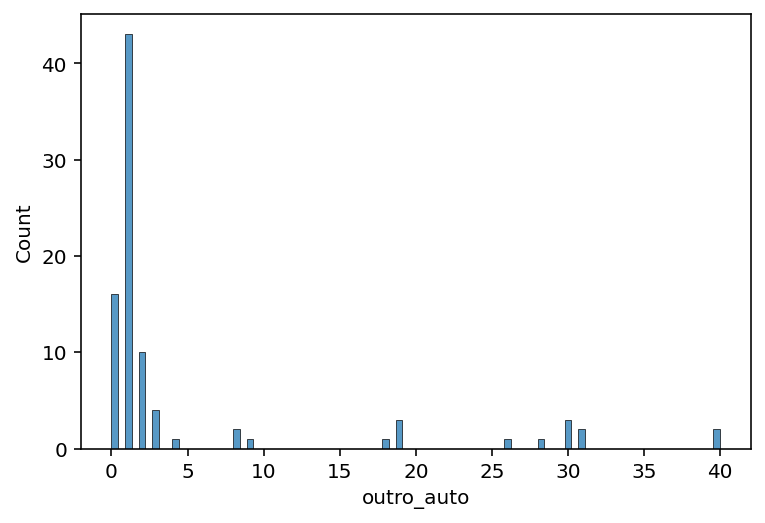

In [10]:
sns.histplot(res['outro_auto'])

In [11]:
res[res['outro_auto'] > 8]['outro_auto'].iloc[0:].sort_values(ascending=False)

out_filename
Lee Konitz - I'll Remember April -1-.mid        40
Lee Konitz - I'll Remember April -2-.mid        40
Ben Webster - Bye Bye Blackbird -1-.mid         31
Ben Webster - Bye Bye Blackbird -2-.mid         31
Cannonball Adderley - So What -1-.mid           30
Dickie Wells - I Got Rhythm -1-.mid             30
Dizzy Gillespie - Groovin' High -1-.mid         30
Clifford Brown - Daahoud -1-.mid                28
Wayne Shorter - Dolores -1-.mid                 26
John Coltrane - Blue Train -1-.mid              19
John Coltrane - Blue Train -2-.mid              19
John Coltrane - Blue Train -3-.mid              19
Coleman Hawkins - Sophisticated Lady -1-.mid    18
Chet Baker - Just Friends -1-.mid                9
Name: outro_auto, dtype: int64

In [15]:
res1 = res[res.index.str.contains('-1-')]

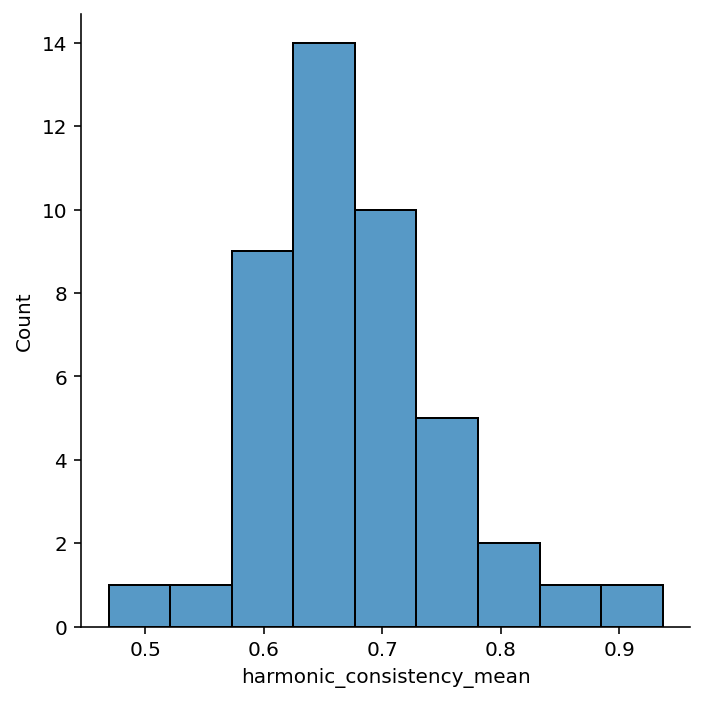

In [16]:
sns.displot(res1['harmonic_consistency_mean'])

In [20]:
res1[
    res1['harmonic_consistency_mean'] <= 0.65
].sort_values('harmonic_consistency_mean')[['harmonic_consistency_mean']]

,harmonic_consistency_mean
out_filename,
Steve Lacy - Alone Together -1-.mid,0.468996
Lee Morgan - Blue Train -1-.mid,0.558903
Wayne Shorter - Dolores -1-.mid,0.574634
David Murray - Ask Me Now -1-.mid,0.583611
Milt Jackson - Bemsha Swing -1-.mid,0.591180
Charlie Parker - Don't Blame Me -1-.mid,0.603513
Steve Lacy - Ask Me Now -1-.mid,0.610484
Clifford Brown - Daahoud -1-.mid,0.611093
John Coltrane - So What -1-.mid,0.613568


In [21]:
res2 = res[res.index.str.contains('-2-')]

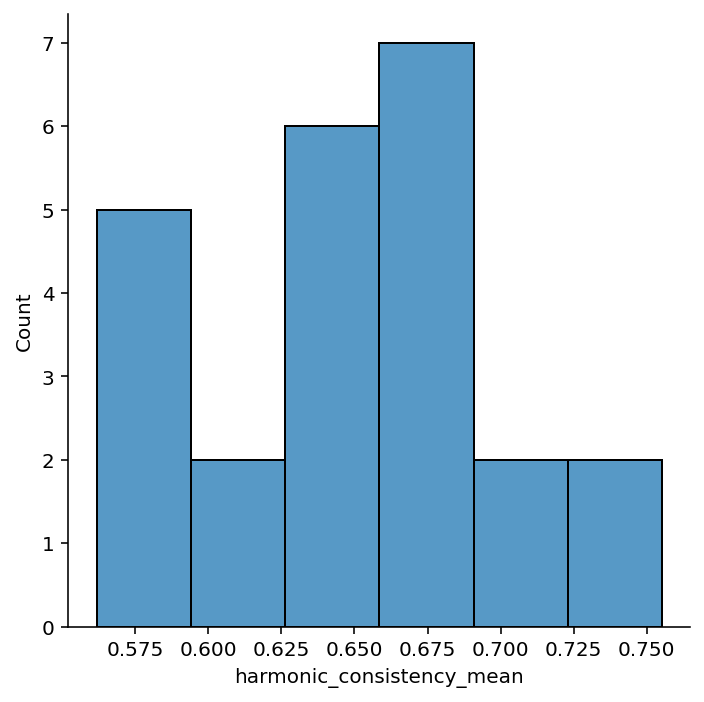

In [22]:
sns.displot(res2['harmonic_consistency_mean'])

In [23]:
res2[
    res2['harmonic_consistency_mean'] <= 0.65
].sort_values('harmonic_consistency_mean')[['harmonic_consistency_mean']]

,harmonic_consistency_mean
out_filename,
John Coltrane - Blue Train -2-.mid,0.561689
David Liebman - Secret Love -2-.mid,0.563871
Don Ellis - I Love You -2-.mid,0.580295
Miles Davis - So What -2-.mid,0.580950
Chris Potter - Anthropology -2-.mid,0.587796
Lee Morgan - Blue Train -2-.mid,0.605091
Art Pepper - Anthropology -2-.mid,0.622929
Milt Jackson - Bemsha Swing -2-.mid,0.627959
John Coltrane - So What -2-.mid,0.641632


In [11]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-20-03-2022-22-42-16.csv', 
    index_col=0).set_index('out_filename')

In [25]:
res3 = res[res.index.str.contains('-3-')]

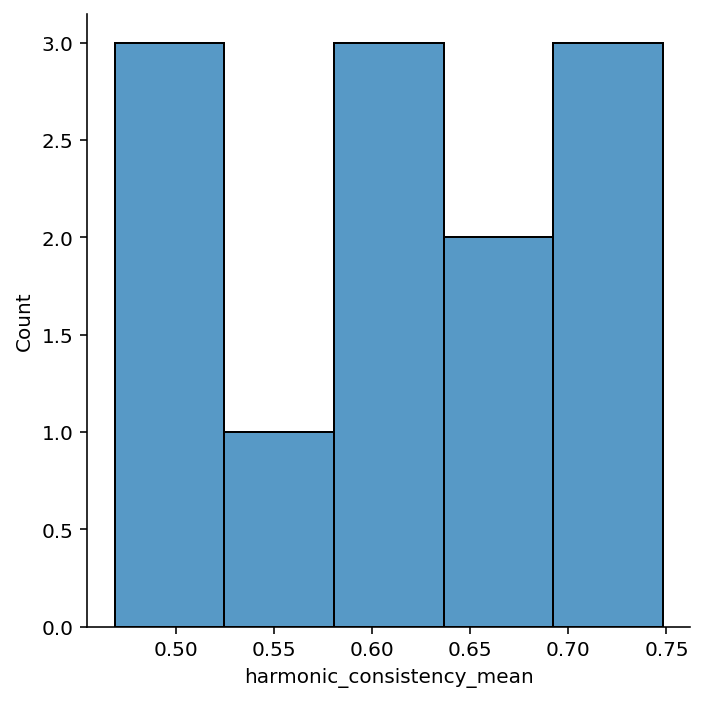

In [26]:
sns.displot(res3['harmonic_consistency_mean'])

In [27]:
res3[
    res3['harmonic_consistency_mean'] <= 0.65
].sort_values('harmonic_consistency_mean')[['harmonic_consistency_mean']]

,harmonic_consistency_mean
out_filename,
David Liebman - Secret Love -3-.mid,0.469028
Milt Jackson - Bemsha Swing -3-.mid,0.504575
Chris Potter - Anthropology -3-.mid,0.510575
Benny Carter - Just Friends -3-.mid,0.564849
John Coltrane - Blue Train -3-.mid,0.585266
David Liebman - There Will Never Be Another You -3-.mid,0.594499
Miles Davis - Airegin -3-.mid,0.635015
Bob Berg - I Didn't Know What Time It Was -3-.mid,0.638691


In [28]:
import numpy as np

def calculate_silence_ratio(filename):
    df = pd.read_csv(filename, index_col=0)

    n_measures = df['measure'].unique()[-1]
    c = np.zeros(n_measures)
    previous = None
    current = None
    
    for measure in range(n_measures):        
        current = df[df['measure'] == measure]
        
        b = len(current)
            
        if b > 0:
            c[measure] = 1
        
        if previous is not None:             
            a = (previous['offset'] + previous['duration']) / 48
            aa = a[a >= 1]
                        
            if len(aa) > 0:
                c[measure] = 1             
                aaa = a[a >= 2]

                if len(aaa) > 0:
                    c[measure + 1] = 1
                    aaaa = a[a >= 2]

                    if len(aaaa) > 0:
                        c[measure + 2] = 1
                        
        previous = current
        
#         print(measure, c[measure] == 1.0)

    print('-----')
    print(c.mean())
    
    return c.mean()

In [29]:
silences = []

for filename in res.index:
    d = f'../data/split_melody_data/v1.2/Weimar DB/{filename.replace(".mid", ".csv")}'
    
    silence = calculate_silence_ratio(d)
    
    silences.append(silence)
    
res.loc[:, 'silences'] = silences

-----
0.9354838709677419
-----
0.9354838709677419
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.9428571428571428
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.9574468085106383
-----
0.9787234042553191
-----
0.96
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.9565217391304348
-----
0.8695652173913043
-----
0.9130434782608695
-----
0.9130434782608695
-----
0.9130434782608695
-----
0.8695652173913043
-----
0.967741935483871
-----
0.9354838709677419
-----
0.967741935483871
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.967741935483871
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.9428571428571428
-----
0.9714285714285714
-----
0.9714285714285714
-----
1.0
-----
0.9534883720930233
-----
1.0
-----
1.0
-----
0.967741935483871
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
1.0
-----
0.935483870967741

<AxesSubplot:ylabel='Density'>

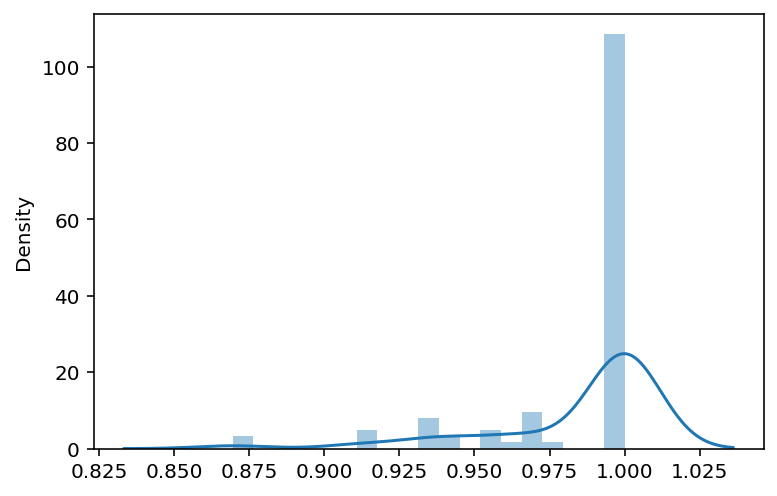

In [30]:
sns.distplot(silences)

In [31]:
res['silences'].sort_values()

out_filename
David Liebman - Secret Love -2-.mid             0.869565
David Liebman - Secret Love -6-.mid             0.869565
David Liebman - Secret Love -5-.mid             0.913043
David Liebman - Secret Love -4-.mid             0.913043
David Liebman - Secret Love -3-.mid             0.913043
                                                  ...   
Dizzy Gillespie - Groovin' High -1-.mid         1.000000
Dizzy Gillespie - Anthropology -1-.mid          1.000000
Dickie Wells - I Got Rhythm -1-.mid             1.000000
Coleman Hawkins - Sophisticated Lady -1-.mid    1.000000
Woody Shaw - Imagination -1-.mid                1.000000
Name: silences, Length: 90, dtype: float64